In this notebook, we demonstrate the ways in which two pdf's can be compared. Here, we show the following for discrete random variables:


1.   Self entropy for a pmf
2.   Cross entropy between two pmf's
3.   K-L divergence between two pmf's
4.   Mutual Information between two rv's





In [ ]:
#import libraries
from matplotlib import pyplot
import numpy as np

## **1. Self entropy for a pmf**

Considering a discrete random variable $x$ with the probability mass function $p(x)$, the self entropy is defined as
$$H(p(x)) = - \sum_{x} p(x) \log(p(x))$$
Here we calculate the self entropy of the following pmf
$$p(x) = \begin{cases} 
      0.2 & x = 0 \\
      0.7 & x = 1 \\
      0.1 & x = 2 \\
      0 & otherwise 
   \end{cases}$$

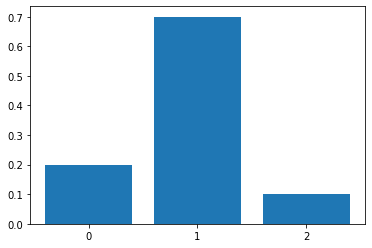

Self entropy H(p(x)): 0.802


In [ ]:
#define pmf
x = ['0','1','2']
p = [0.20,0.70,0.10]
#print('P=%.3f ' % (sum(p)))
pyplot.bar(x, p)
pyplot.show()

#calculate entropy
H_p = -sum(p[i]*np.log(p[i]) for i in range (len(p))) 
print('Self entropy H(p(x)): %.3f' %H_p)

## **2. Cross entropy between 2 pmf's**

Consider a discrete random variable with 2 probability mass functions p(x) and q(x), the cross entropy is defined as
$$H(p(x),q(x)) = -\sum_x p(x) log(q(x))$$
The pmf for p(x) is same as above. The pmf for q(x) is taken to be
$$q(x) = \begin{cases} 
      0.6 & x = 0 \\
      0.3 & x = 1 \\
      0.1 & x = 2 \\
      0 & otherwise 
   \end{cases}$$
We calculate the cross entropy between these two pmf's

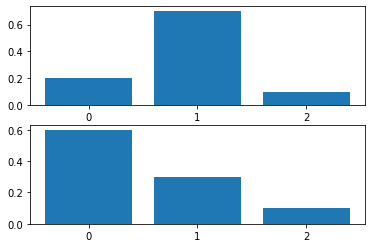

Cross Entropy H(p(x),q(x)): 1.175


In [ ]:
#define pmf
x = ['0','1','2']
p = [0.20,0.70,0.10]
q = [0.60,0.30,0.10]
#print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
pyplot.subplot(2,1,1)
pyplot.bar(x, p)
pyplot.subplot(2,1,2)
pyplot.bar(x, q)
pyplot.show()

#calculate cross entropy
H_pq = -sum(p[i]*np.log(q[i]) for i in range (len(p))) 
print('Cross Entropy H(p(x),q(x)): %.3f' %H_pq)

## **3. KL divergence between 2 pmf's**

Consider a discrete random variable with 2 probability mass functions p(x) and q(x), the cross entropy is defined as
$$KL(p(x)|| q(x)) = -\sum_x p(x) log(\frac{q(x)}{p(x)})$$
Here, we calculate the KL divergence between the two pmf's defined in the above sections

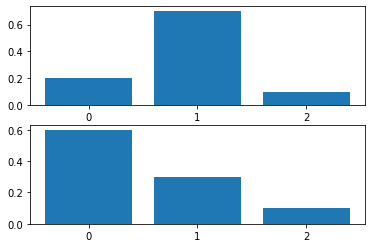

KL divergence KL(p(x)|| q(x)): 0.373


In [ ]:
#define pmf
x = ['0','1','2']
p = [0.20,0.70,0.10]
q = [0.60,0.30,0.10]
#print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
pyplot.subplot(2,1,1)
pyplot.bar(x, p)
pyplot.subplot(2,1,2)
pyplot.bar(x, q)
pyplot.show()

#calculate KL divergence
KL_pq = -sum(p[i]*np.log(q[i]/p[i]) for i in range (len(p))) 
print('KL divergence KL(p(x)|| q(x)): %.3f' %KL_pq)

## **4. Mutual information between two rv's X and Y**

Consider two radom variables X and Y with marginal pmf's $p(x)$ and $p(y)$ respectively and the joint pmf as $p(x,y)$. The mutual information is defined as
$$I(X;Y) = H(X) - H(X|Y) = H(X) + H(Y) - H(X,Y)$$
which can be expressed in terms of KL divergence as 
$$I(X;Y) = KL(p(x,y)|| p(x)p(y)) = \sum_{x,y} log\frac{p(x,y)}{p(x)p(y)} $$ 


Let $p(x,y)$ be defined as:

$$p(0, 0) = 0.2 \qquad p(0,1) = 0.05 \qquad p(0, 2) = 0.1$$

$$p(1, 0) = 0.05 \qquad p(1, 1) = 0.15 \qquad p(1, 2) = 0.2$$

$$p(2, 0) = 0.1 \qquad p(2, 1) = 0.1 \qquad p(2, 2) = 0.05$$

We calculate the mutual information between these two rv's

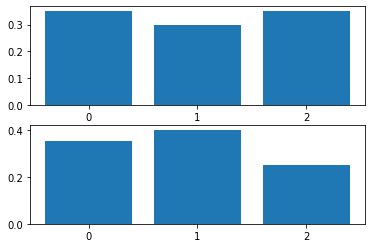

Mutual Information I(X; Y): -1.043


In [ ]:
#define joint pmf
x = ['0','1','2']
p = [[0.2, 0.05, 0.1], [0.05, 0.15, 0.2], [0.1, 0.1, 0.05]]

#define marginal pmf
p_x = np.sum(p, axis=0)
p_y = np.sum(p, axis=1)

#print('P_x=%.3f P_y=%.3f' % (sum(p_x), sum(p_y)))
pyplot.subplot(2,1,1)
pyplot.bar(x, p_x)
pyplot.subplot(2,1,2)
pyplot.bar(x, p_y)
pyplot.show()

#calculate mutual information
MI_xy = 0
for i in range (np.shape(p)[0]):
  for j in range (np.shape(p)[1]):
    MI_xy += np.log(p[i][j]/(p_x[i]*p_y[j]))
print('Mutual Information I(X; Y): %.3f' %MI_xy)